In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dalng=pd.read_csv('data/train.csv',encoding='utf-8')

In [223]:
del dalng['count']

In [6]:
dalng.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,rank
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49,C
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159,A
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26,D
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57,C
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431,A


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


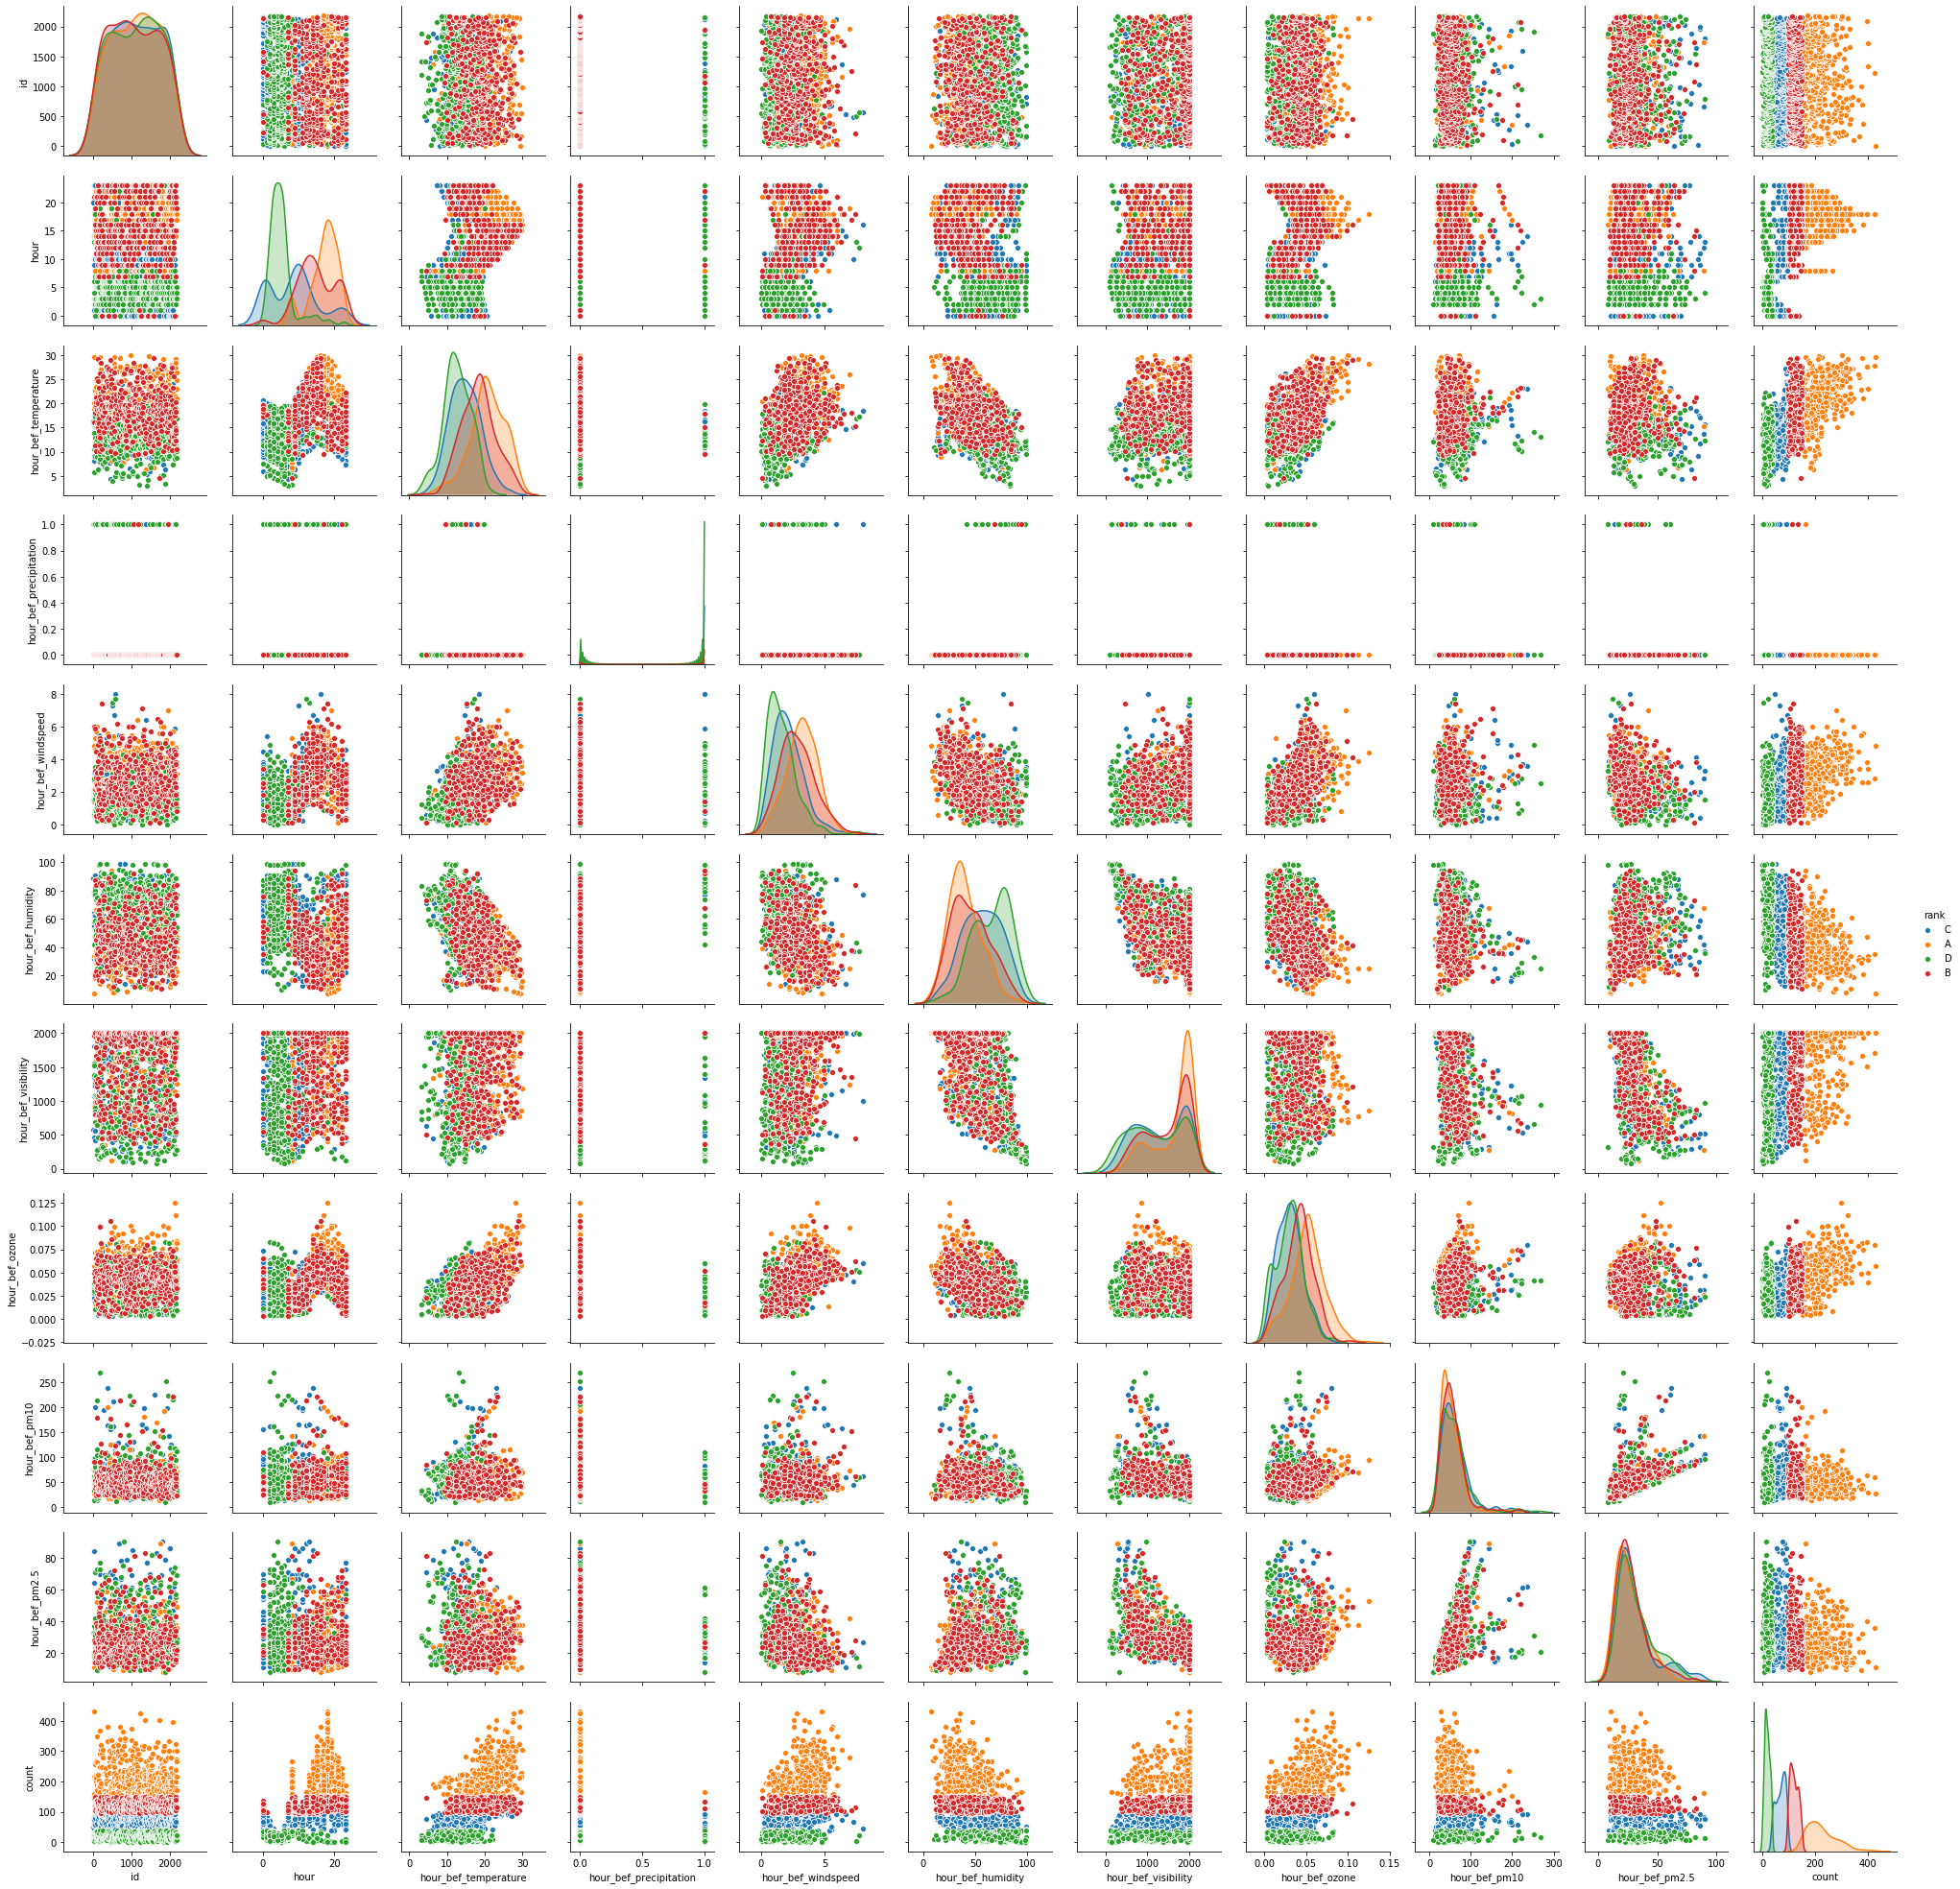

In [102]:
sns.pairplot(dalng, hue='rank')

In [7]:
dalng['rank'].value_counts()

D    370
B    365
C    362
A    362
Name: rank, dtype: int64

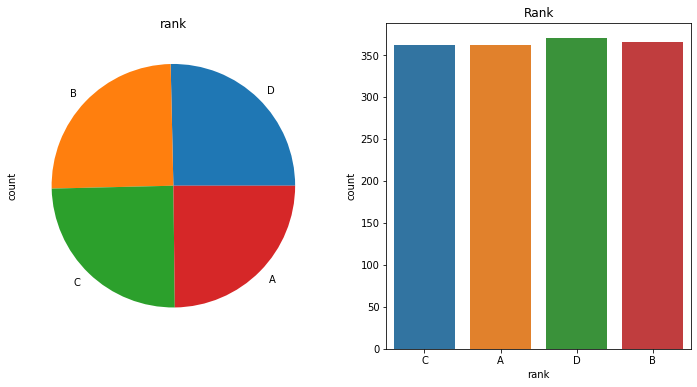

In [8]:
f,ax=plt.subplots(1,2,figsize=(12,6))

dalng['rank'].value_counts().plot.pie(ax=ax[0])
ax[0].set_title('rank')
ax[0].set_ylabel('count')

sns.countplot('rank', data=dalng,ax=ax[1])
ax[1].set_title('Rank')
plt.show()

In [146]:
dalng.groupby('hour_bef_precipitation').size()

hour_bef_precipitation
0.0    1288
1.0      40
dtype: int64

In [9]:
dalng.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


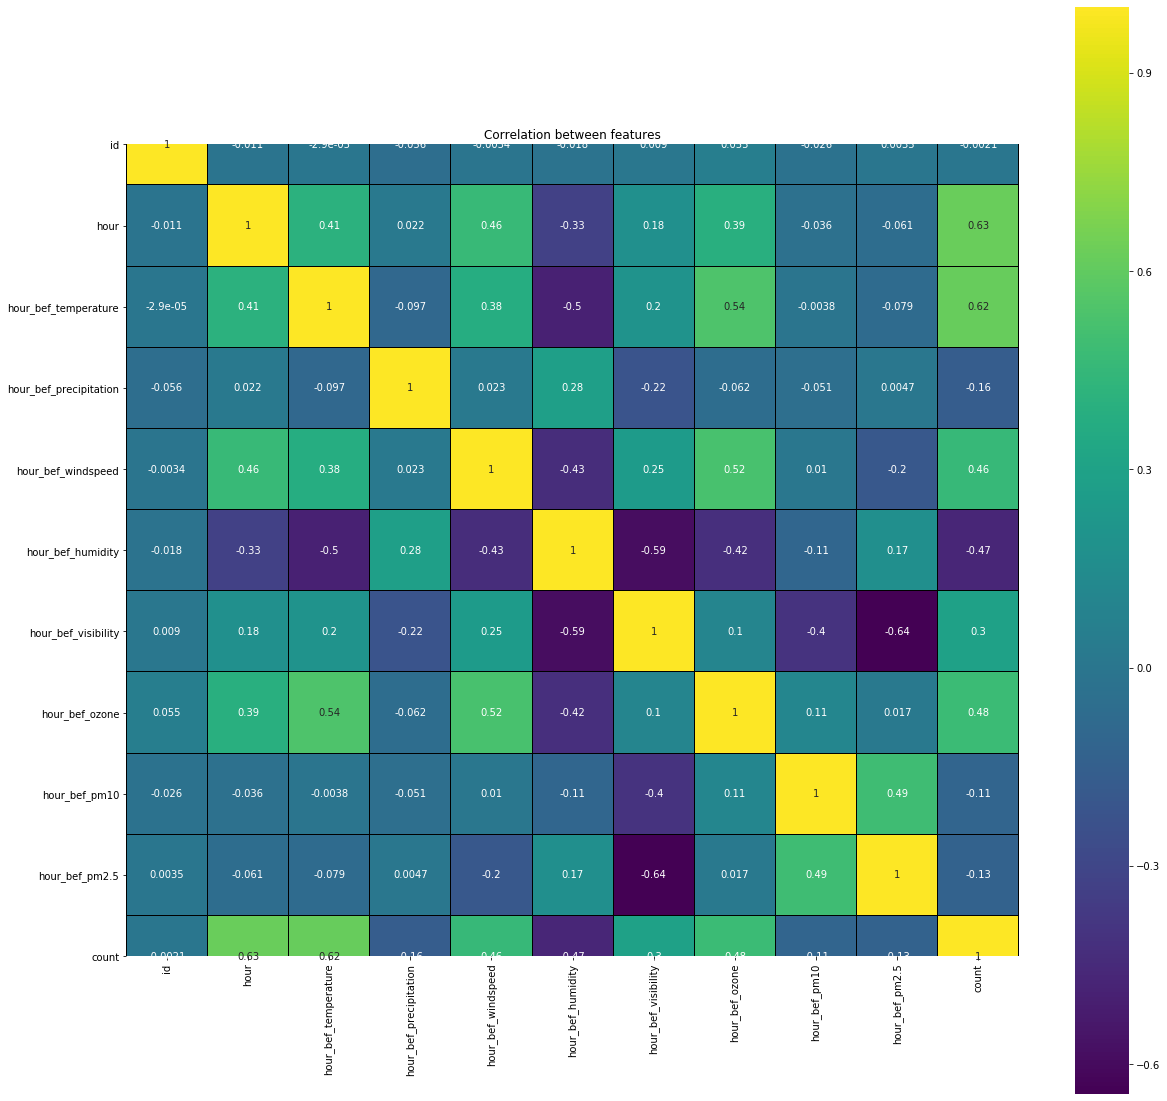

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(dalng.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="black")
plt.title('Correlation between features')
plt.show()

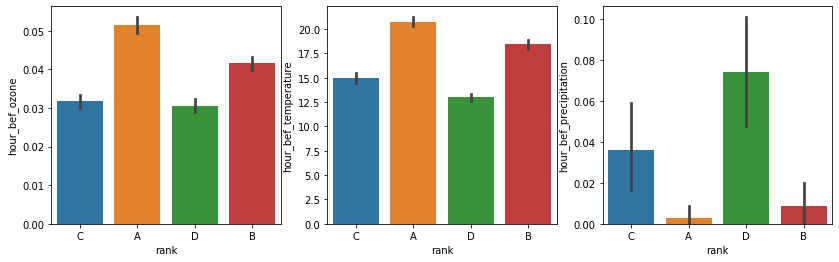

In [226]:
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot('rank', 'hour_bef_ozone', data=dalng) #평균을 가지고 막대그래프 그림

#age_cat, sex
plt.subplot(132)
sns.barplot('rank', 'hour_bef_temperature', data=dalng)


plt.subplot(133)
sns.barplot('rank','hour_bef_precipitation', data=dalng)

plt.show()

In [12]:
dalng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 12 columns):
id                        1459 non-null int64
hour                      1459 non-null int64
hour_bef_temperature      1457 non-null float64
hour_bef_precipitation    1457 non-null float64
hour_bef_windspeed        1450 non-null float64
hour_bef_humidity         1457 non-null float64
hour_bef_visibility       1457 non-null float64
hour_bef_ozone            1383 non-null float64
hour_bef_pm10             1369 non-null float64
hour_bef_pm2.5            1342 non-null float64
count                     1459 non-null int64
rank                      1459 non-null object
dtypes: float64(8), int64(3), object(1)
memory usage: 136.9+ KB


In [17]:
dalng2=dalng[['hour','hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility','hour_bef_ozone']]

In [18]:
dalng2= dalng2[dalng['hour'].notnull()]
dalng2= dalng2[dalng['hour_bef_temperature'].notnull()]
dalng2= dalng2[dalng['hour_bef_precipitation'].notnull()]
dalng2= dalng2[dalng['hour_bef_windspeed'].notnull()]
dalng2= dalng2[dalng['hour_bef_humidity'].notnull()]
dalng2= dalng2[dalng['hour_bef_visibility'].notnull()]
dalng2= dalng2[dalng['hour_bef_ozone'].notnull()]
dalng2= dalng2[dalng['count'].notnull()]

In [121]:
dalng2['hour'] = dalng2['hour'].astype('float')
dalng2['count'] = dalng2['count'].astype('float')
dalng2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,count
0,20.0,16.3,1.0,1.5,89.0,576.0,0.027,49.0
1,13.0,20.1,0.0,1.4,48.0,916.0,0.042,159.0
2,6.0,13.9,0.0,0.7,79.0,1382.0,0.033,26.0
3,23.0,8.1,0.0,2.7,54.0,946.0,0.040,57.0
4,18.0,29.5,0.0,4.8,7.0,2000.0,0.057,431.0


In [188]:
dalng2

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone
0,20,16.3,1.0,1.5,89.0,576.0,0.027
1,13,20.1,0.0,1.4,48.0,916.0,0.042
2,6,13.9,0.0,0.7,79.0,1382.0,0.033
3,23,8.1,0.0,2.7,54.0,946.0,0.040
4,18,29.5,0.0,4.8,7.0,2000.0,0.057
...,...,...,...,...,...,...,...
1454,4,16.8,0.0,1.6,53.0,2000.0,0.031
1455,3,10.8,0.0,3.8,45.0,2000.0,0.039
1456,5,18.3,0.0,1.9,54.0,2000.0,0.009
1457,21,20.7,0.0,3.7,37.0,1395.0,0.082


In [15]:
dalng=dalng.dropna()

In [16]:
dalng

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,rank
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49,C
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159,A
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26,D
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57,C
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431,A
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21,D
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20,D
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22,D
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216,A


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dalng2,dalng['rank'], test_size=0.2, train_size=0.8, shuffle=True)

In [21]:
clf = LinearSVC()

In [22]:
clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [23]:
test_data = x_test
test_label = clf.predict(test_data)

In [24]:
data = dalng2
correct= dalng['rank']

In [25]:
accuracy_score(y_test,test_label)

0.3233082706766917

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
rank_clf=DecisionTreeClassifier(max_depth=8, random_state=20)
rank_clf.fit(data, correct)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')

In [29]:
rank_clf.predict_proba([[1,2,3,4,5,6,7]]) # [1,0,0] 

array([[0., 0., 0., 1.]])

In [30]:
rank_clf.predict([[1,2,3,4,5,6,7]]) # [1,0,0] 

array(['D'], dtype=object)

In [32]:
from sklearn.tree import export_graphviz

In [33]:
export_graphviz(
    rank_clf,
    out_file='dalng_tree.dot',
    feature_names=['hour','hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility','hour_bef_ozone'],
    class_names= dalng['rank'],
    rounded=True,
    filled=True
)

In [34]:
import graphviz

In [35]:
with open('dalng_tree.dot') as f:
    dot_graph=f.read()
    dot = graphviz.Source(dot_graph)
dot.format ='png'
dot.render(filename='dalng_tree', directory='images/tree', cleanup=True)

'images/tree\\dalng_tree.png'

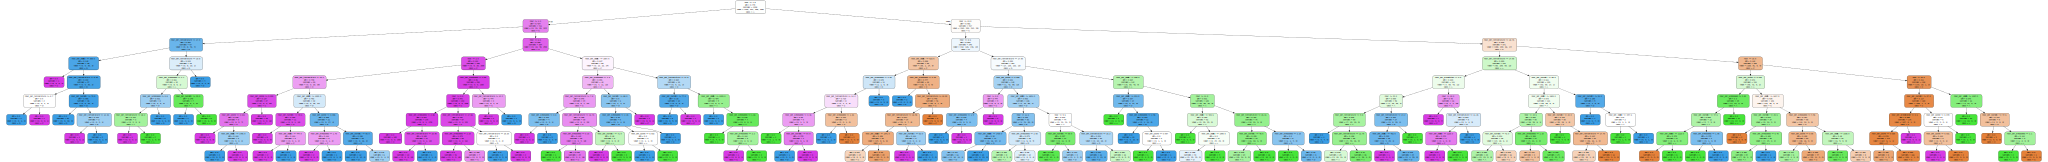

In [36]:
dot